<a href="https://colab.research.google.com/github/hamagami/anomaly-detection/blob/main/pycaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# 必要なライブラリのインストール
!pip install pycaret[analysis]

# 必要なライブラリのインポート
import pandas as pd
from pycaret.anomaly import *

# サンプルデータセットの取得と前処理
# この例ではPyCaretのサンプルデータセットを使用します
from pycaret.datasets import get_data
data = get_data('anomaly')

# データの最初の5行を表示
print(data.head())

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10
0,0.263995,0.764929,0.138424,0.935242,0.605867,0.518790,0.912225,0.608234,0.723782,0.733591
1,0.546092,0.653975,0.065575,0.227772,0.845269,0.837066,0.272379,0.331679,0.429297,0.367422
2,0.336714,0.538842,0.192801,0.553563,0.074515,0.332993,0.365792,0.861309,0.899017,0.088600
3,0.092108,0.995017,0.014465,0.176371,0.241530,0.514724,0.562208,0.158963,0.073715,0.208463
4,0.325261,0.805968,0.957033,0.331665,0.307923,0.355315,0.501899,0.558449,0.885169,0.182754


       Col1      Col2      Col3      Col4      Col5      Col6      Col7  \
0  0.263995  0.764929  0.138424  0.935242  0.605867  0.518790  0.912225   
1  0.546092  0.653975  0.065575  0.227772  0.845269  0.837066  0.272379   
2  0.336714  0.538842  0.192801  0.553563  0.074515  0.332993  0.365792   
3  0.092108  0.995017  0.014465  0.176371  0.241530  0.514724  0.562208   
4  0.325261  0.805968  0.957033  0.331665  0.307923  0.355315  0.501899   

       Col8      Col9     Col10  
0  0.608234  0.723782  0.733591  
1  0.331679  0.429297  0.367422  
2  0.861309  0.899017  0.088600  
3  0.158963  0.073715  0.208463  
4  0.558449  0.885169  0.182754  


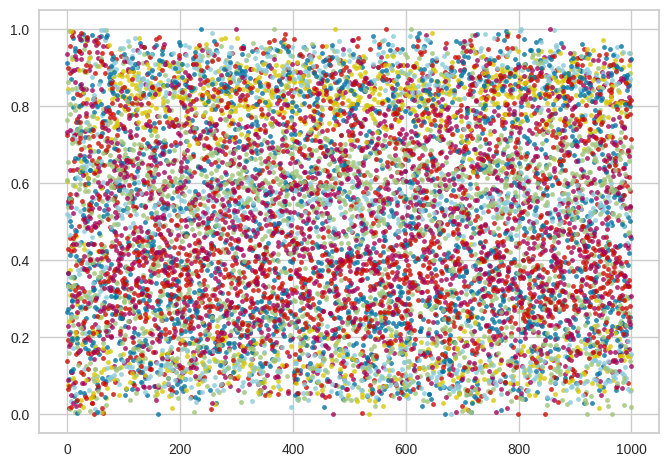

In [ ]:
plt.plot(data,linewidth=0,marker=".",alpha=0.8)
plt.show()

In [ ]:


# PyCaretで異常検知モデルをセットアップ
exp = setup(data)

# Isolation Forestを使った異常検知モデルの作成とトレーニング
iforest = create_model('iforest')

# モデルの結果を表示
print(iforest)

# 異常スコアを追加したデータフレームを取得
iforest_results = assign_model(iforest)
print(iforest_results.head())



,Description,Value
0,Session id,6826
1,Original data shape,"(1000, 10)"
2,Transformed data shape,"(1000, 10)"
3,Numeric features,10
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

IForest(behaviour='new', bootstrap=False, contamination=0.05,
    max_features=1.0, max_samples='auto', n_estimators=100, n_jobs=-1,
    random_state=6826, verbose=0)
       Col1      Col2      Col3      Col4      Col5      Col6      Col7  \
0  0.263995  0.764929  0.138424  0.935242  0.605867  0.518790  0.912225   
1  0.546092  0.653975  0.065575  0.227772  0.845269  0.837066  0.272379   
2  0.336714  0.538842  0.192801  0.553563  0.074515  0.332993  0.365792   
3  0.092108  0.995017  0.014465  0.176371  0.241530  0.514724  0.562208   
4  0.325261  0.805968  0.957033  0.331665  0.307923  0.355315  0.501899   

       Col8      Col9     Col10  Anomaly  Anomaly_Score  
0  0.608234  0.723782  0.733591        0      -0.013858  
1  0.331679  0.429297  0.367422        0      -0.085936  
2  0.861309  0.899017  0.088600        1       0.015082  
3  0.158963  0.073715  0.208463        1       0.061753  
4  0.558449  0.885169  0.182754        0      -0.009826  


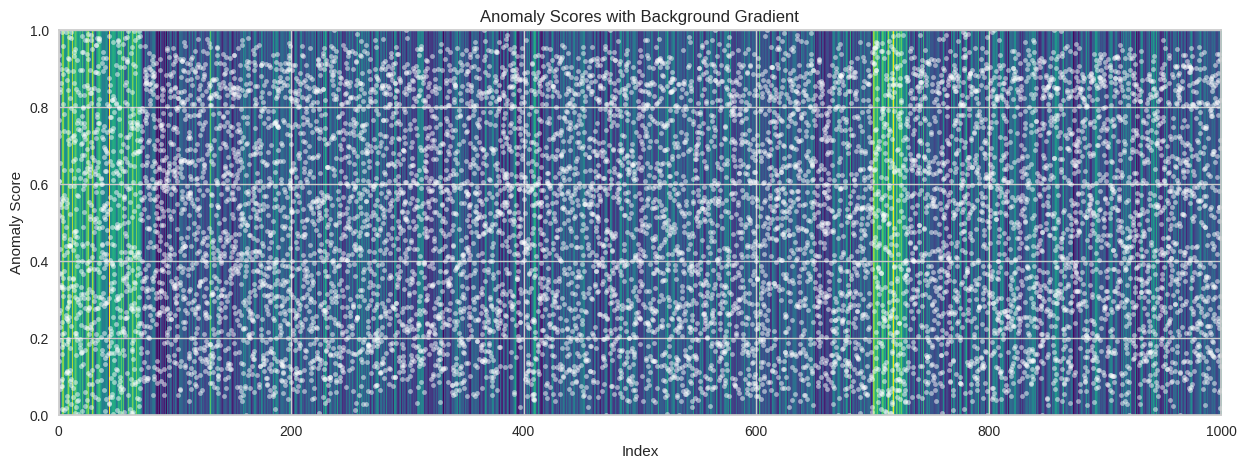

In [ ]:


anomaly_scores = iforest_results["Anomaly_Score"].values
anomaly_scores_2d = anomaly_scores.reshape(1, -1)  # 1行に並べた2次元配列に変換

# グラフの背景として異常スコアをプロット
plt.figure(figsize=(15, 5))

# 背景の描画
plt.imshow(anomaly_scores_2d, aspect='auto', cmap='viridis', origin='lower', extent=[0, len(anomaly_scores), 0, 1])

# 背景を表示した上に線グラフを描画
#plt.plot(np.linspace(0, len(anomaly_scores) - 1, len(anomaly_scores)), anomaly_scores, color='white', lw=2, label='Anomaly Score')
plt.plot(np.linspace(0, len(data) - 1, len(data)), data, color='white', linewidth=0, marker=".",alpha=0.5)




# タイトルとラベルの追加
plt.title('Anomaly Scores with Background Gradient')
plt.xlabel('Index')
plt.ylabel('Anomaly Score')
plt.legend()

# グラフの表示
plt.show()



In [ ]:

# 異常スコアの可視化
plot_model(iforest, plot='umap')